# **Deep Learning With Python  -  CHAPTER 5**

- This code provides a structured and modular approach to experimenting with deep learning models using the MNIST and IMDB datasets.

- The `DataLoader` class handles data loading and preprocessing, including noise augmentation and label shuffling. The `ModelBuilder` class constructs different neural network architectures, including regularized models and dropout-based networks.

- The `Trainer` class manages model compilation and training, while the `Evaluator` class assesses model performance. The `Plotter` class visualizes training results, making it easier to compare different experiments.

- This structured implementation enables systematic testing of **noise effects, model capacity, learning rates, and regularization techniques (L1, L2, Dropout)** to analyze their impact on model performance, ensuring modularity and scalability for future experiments. 🚀

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist, imdb

In [2]:
class DataLoader:
    @staticmethod
    def load_mnist():
        (train_images, train_labels), _ = mnist.load_data()
        train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255
        return train_images, train_labels

    @staticmethod
    def load_imdb():
        (train_data, train_labels), _ = imdb.load_data(num_words=10000)
        return train_data, train_labels

    @staticmethod
    def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.0
        return results

In [3]:
class ModelBuilder:
    @staticmethod
    def build_dense_model(input_shape, output_units, hidden_units=512, activation="relu", output_activation="softmax"):
        model = keras.Sequential([
            layers.Dense(hidden_units, activation=activation, input_shape=(input_shape,)),
            layers.Dense(output_units, activation=output_activation)
        ])
        return model

    @staticmethod
    def build_imdb_model(hidden_units=16, output_units=1, activation="relu", output_activation="sigmoid"):
        model = keras.Sequential([
            layers.Dense(hidden_units, activation=activation),
            layers.Dense(hidden_units, activation=activation),
            layers.Dense(output_units, activation=output_activation)
        ])
        return model

    @staticmethod
    def build_regularized_model(l1_reg=0.0, l2_reg=0.002):
        model = keras.Sequential([
            layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg), activation="relu"),
            layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg), activation="relu"),
            layers.Dense(1, activation="sigmoid")
        ])
        return model

    @staticmethod
    def build_dropout_model():
        model = keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(16, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(1, activation="sigmoid")
        ])
        return model

In [4]:
class Trainer:
    def __init__(self, model, train_data, train_labels, validation_split=0.2, learning_rate=0.001):
        self.model = model
        self.train_data = train_data
        self.train_labels = train_labels
        self.validation_split = validation_split
        self.learning_rate = learning_rate

    def compile_model(self, loss_function="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]):
        self.model.compile(optimizer=keras.optimizers.RMSprop(self.learning_rate), loss=loss_function, metrics=metrics)

    def train(self, epochs=10, batch_size=128):
        history = self.model.fit(
            self.train_data, self.train_labels,
            epochs=epochs, batch_size=batch_size,
            validation_split=self.validation_split
        )
        return history.history

In [5]:
class Evaluator:
    @staticmethod
    def evaluate(model, test_data, test_labels):
        results = model.evaluate(test_data, test_labels)
        print(f"Test results: {results}")
        return results

In [6]:
class Plotter:
    @staticmethod
    def plot_history(history, metric="accuracy"):
        epochs = range(1, len(history[metric]) + 1)
        plt.plot(epochs, history[metric], "bo", label=f"Training {metric}")
        plt.plot(epochs, history[f"val_{metric}"], "b", label=f"Validation {metric}")
        plt.title(f"Training and validation {metric}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6905 - loss: 1.0925 - val_accuracy: 0.9103 - val_loss: 0.2918
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9107 - loss: 0.2874 - val_accuracy: 0.9490 - val_loss: 0.1795
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9450 - loss: 0.1770 - val_accuracy: 0.9481 - val_loss: 0.1812
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9624 - loss: 0.1240 - val_accuracy: 0.9588 - val_loss: 0.1459
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9719 - loss: 0.0912 - val_accuracy: 0.9648 - val_loss: 0.1247
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9791 - loss: 0.0656 - val_accuracy: 0.9650 - val_loss: 0.1247
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9858 - loss: 0.0478 - val_accuracy: 0.9678 - val_loss: 0.1190
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9897 - loss: 0.0338 - val_

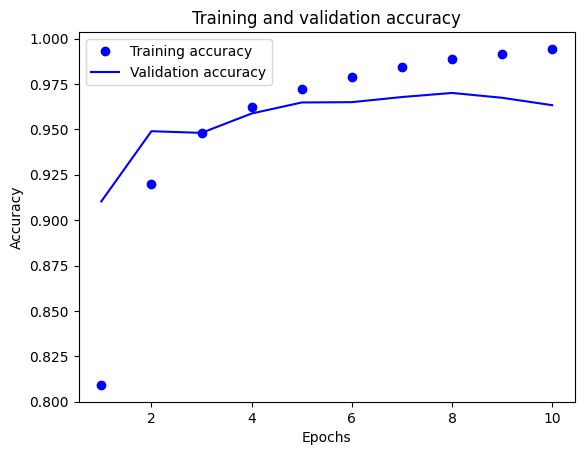

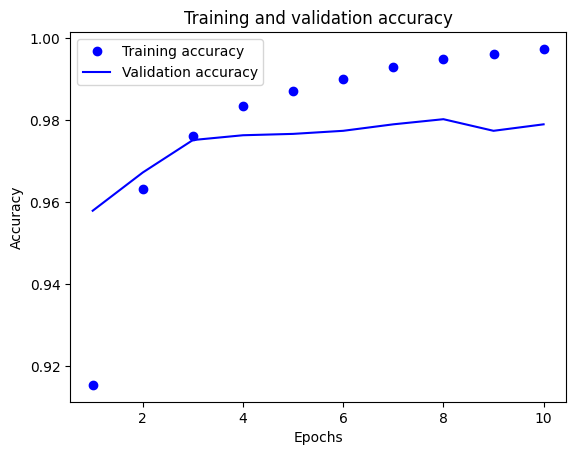

In [7]:
train_images, train_labels = DataLoader.load_mnist()

noisy_data = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
zeros_data = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

model = ModelBuilder.build_dense_model(1568, 10)
trainer = Trainer(model, noisy_data, train_labels)
trainer.compile_model()
history_noise = trainer.train()

model = ModelBuilder.build_dense_model(1568, 10)
trainer = Trainer(model, zeros_data, train_labels)
trainer.compile_model()
history_zeros = trainer.train()

Plotter.plot_history(history_noise, "accuracy")
Plotter.plot_history(history_zeros, "accuracy")

In [8]:
random_labels = train_labels[:]
np.random.shuffle(random_labels)

model = ModelBuilder.build_dense_model(784, 10)
trainer = Trainer(model, train_images, random_labels)
trainer.compile_model()
trainer.train(epochs=100)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1039 - loss: 2.3307 - val_accuracy: 0.1049 - val_loss: 2.3076
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1220 - loss: 2.2975 - val_accuracy: 0.1032 - val_loss: 2.3127
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1319 - loss: 2.2896 - val_accuracy: 0.1040 - val_loss: 2.3185
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1421 - loss: 2.2765 - val_accuracy: 0.1042 - val_loss: 2.3246
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1552 - loss: 2.2602 - val_accuracy: 0.1023 - val_loss: 2.3327
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1695 - loss: 2.2392 - val_accuracy: 0.1008 - val_loss: 2.3470
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1828 - loss: 2.2174 - val_accuracy: 0.1065 - val_loss: 2.3675
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2015 - loss: 2.1887

{'accuracy': [0.10472916811704636,
  0.1185000017285347,
  0.12847916781902313,
  0.13706250488758087,
  0.15027083456516266,
  0.1629166603088379,
  0.1783333271741867,
  0.19481250643730164,
  0.20895832777023315,
  0.22489583492279053,
  0.24147917330265045,
  0.25695833563804626,
  0.2772083282470703,
  0.29239583015441895,
  0.30910417437553406,
  0.3257083296775818,
  0.3435416519641876,
  0.35493749380111694,
  0.3747499883174896,
  0.38752081990242004,
  0.40441668033599854,
  0.41489583253860474,
  0.43193748593330383,
  0.44462499022483826,
  0.45754167437553406,
  0.4730416536331177,
  0.48489582538604736,
  0.4963333308696747,
  0.5087916851043701,
  0.5184583067893982,
  0.5264166593551636,
  0.5407916903495789,
  0.5512499809265137,
  0.5611458420753479,
  0.5704166889190674,
  0.5830000042915344,
  0.5914791822433472,
  0.6004583239555359,
  0.6077083349227905,
  0.6185208559036255,
  0.6275208592414856,
  0.6358749866485596,
  0.6414791941642761,
  0.6530208587646484,
 

In [9]:
for lr in [1.0, 0.01]:
    model = ModelBuilder.build_dense_model(784, 10)
    trainer = Trainer(model, train_images, train_labels, learning_rate=lr)
    trainer.compile_model()
    trainer.train()

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1017 - loss: 2934.2500 - val_accuracy: 0.1107 - val_loss: 2.5011
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0999 - loss: 2.4539 - val_accuracy: 0.0988 - val_loss: 2.5101
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1018 - loss: 2.4512 - val_accuracy: 0.0919 - val_loss: 2.4601
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1003 - loss: 2.4545 - val_accuracy: 0.0993 - val_loss: 2.5266
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1023 - loss: 2.4476 - val_accuracy: 0.0983 - val_loss: 2.4147
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1001 - loss: 2.4557 - val_accuracy: 0.1107 - val_loss: 2.4493
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0996 - loss: 2.4524 - val_accuracy: 0.0976 - val_loss: 2.3984
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0992 - loss: 2.4453 - val_a

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1061 - loss: 2.3048 - val_accuracy: 0.1107 - val_loss: 2.3016
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1123 - loss: 2.3013 - val_accuracy: 0.1107 - val_loss: 2.3018
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1090 - val_loss: 2.3024
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1149 - loss: 2.3002 - val_accuracy: 0.1109 - val_loss: 2.3023
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1137 - loss: 2.3000 - val_accuracy: 0.1103 - val_loss: 2.3023
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1141 - loss: 2.2991 - val_accuracy: 0.1104 - val_loss: 2.3030
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1151 - loss: 2.2986 - val_accuracy: 0.1101 - val_loss: 2.3036
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1156 - loss: 2.2985 - val_accuracy: 0.

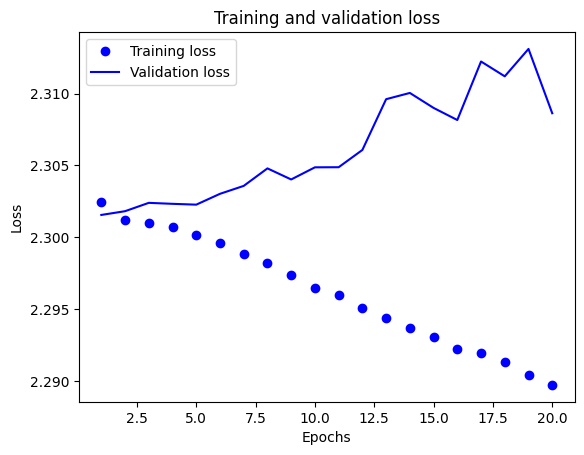

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1031 - loss: 2.3191 - val_accuracy: 0.1088 - val_loss: 2.3022
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1126 - loss: 2.3006 - val_accuracy: 0.1072 - val_loss: 2.3056
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1179 - loss: 2.2962 - val_accuracy: 0.1092 - val_loss: 2.3082
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1218 - loss: 2.2916 - val_accuracy: 0.0988 - val_loss: 2.3128
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1316 - loss: 2.2852 - val_accuracy: 0.1007 - val_loss: 2.3165
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1409 - loss: 2.2768 - val_accuracy: 0.1058 - val_loss: 2.3202
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1458 - loss: 2.2709 - val_accuracy: 0.1094 - val_loss: 2.3257
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1516 - loss: 2.2624 - val_accuracy: 0.

In [10]:
small_model = ModelBuilder.build_dense_model(784, 10, hidden_units=10)
trainer = Trainer(small_model, train_images, train_labels)
trainer.compile_model()
history_small = trainer.train(epochs=20)
Plotter.plot_history(history_small, "loss")

large_model = ModelBuilder.build_dense_model(784, 10, hidden_units=96)
trainer = Trainer(large_model, train_images, train_labels)
trainer.compile_model()
history_large = trainer.train(epochs=20)

In [11]:
l2_model = ModelBuilder.build_regularized_model(l2_reg=0.002)
trainer = Trainer(l2_model, train_images, train_labels)
trainer.compile_model()
trainer.train()

dropout_model = ModelBuilder.build_dropout_model()
trainer = Trainer(dropout_model, train_images, train_labels)
trainer.compile_model()
trainer.train()

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
